<a href="https://colab.research.google.com/github/ambulesubhada07/Machine-learning-algorithm/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://github.com/hakimyameen/Datasets/blob/main/heart.csv
#https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

In [2]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


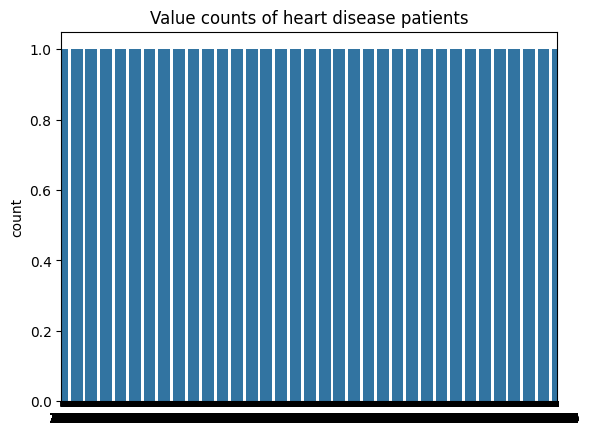

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/heart.csv')
print(df.head())
sns.countplot(df['target'])
plt.title('Value counts of heart disease patients')
plt.show()

In [6]:
# Putting feature variable to X
X = df.drop('target',axis=1)
# Putting response variable to y
y = df['target']

In [7]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((64902, 13), (27816, 13))

In [8]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

#%%time
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [9]:
classifier_rf.oob_score_

0.9380912760777788

In [10]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

#%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [11]:
grid_search.best_score_

np.float64(1.0)

In [12]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

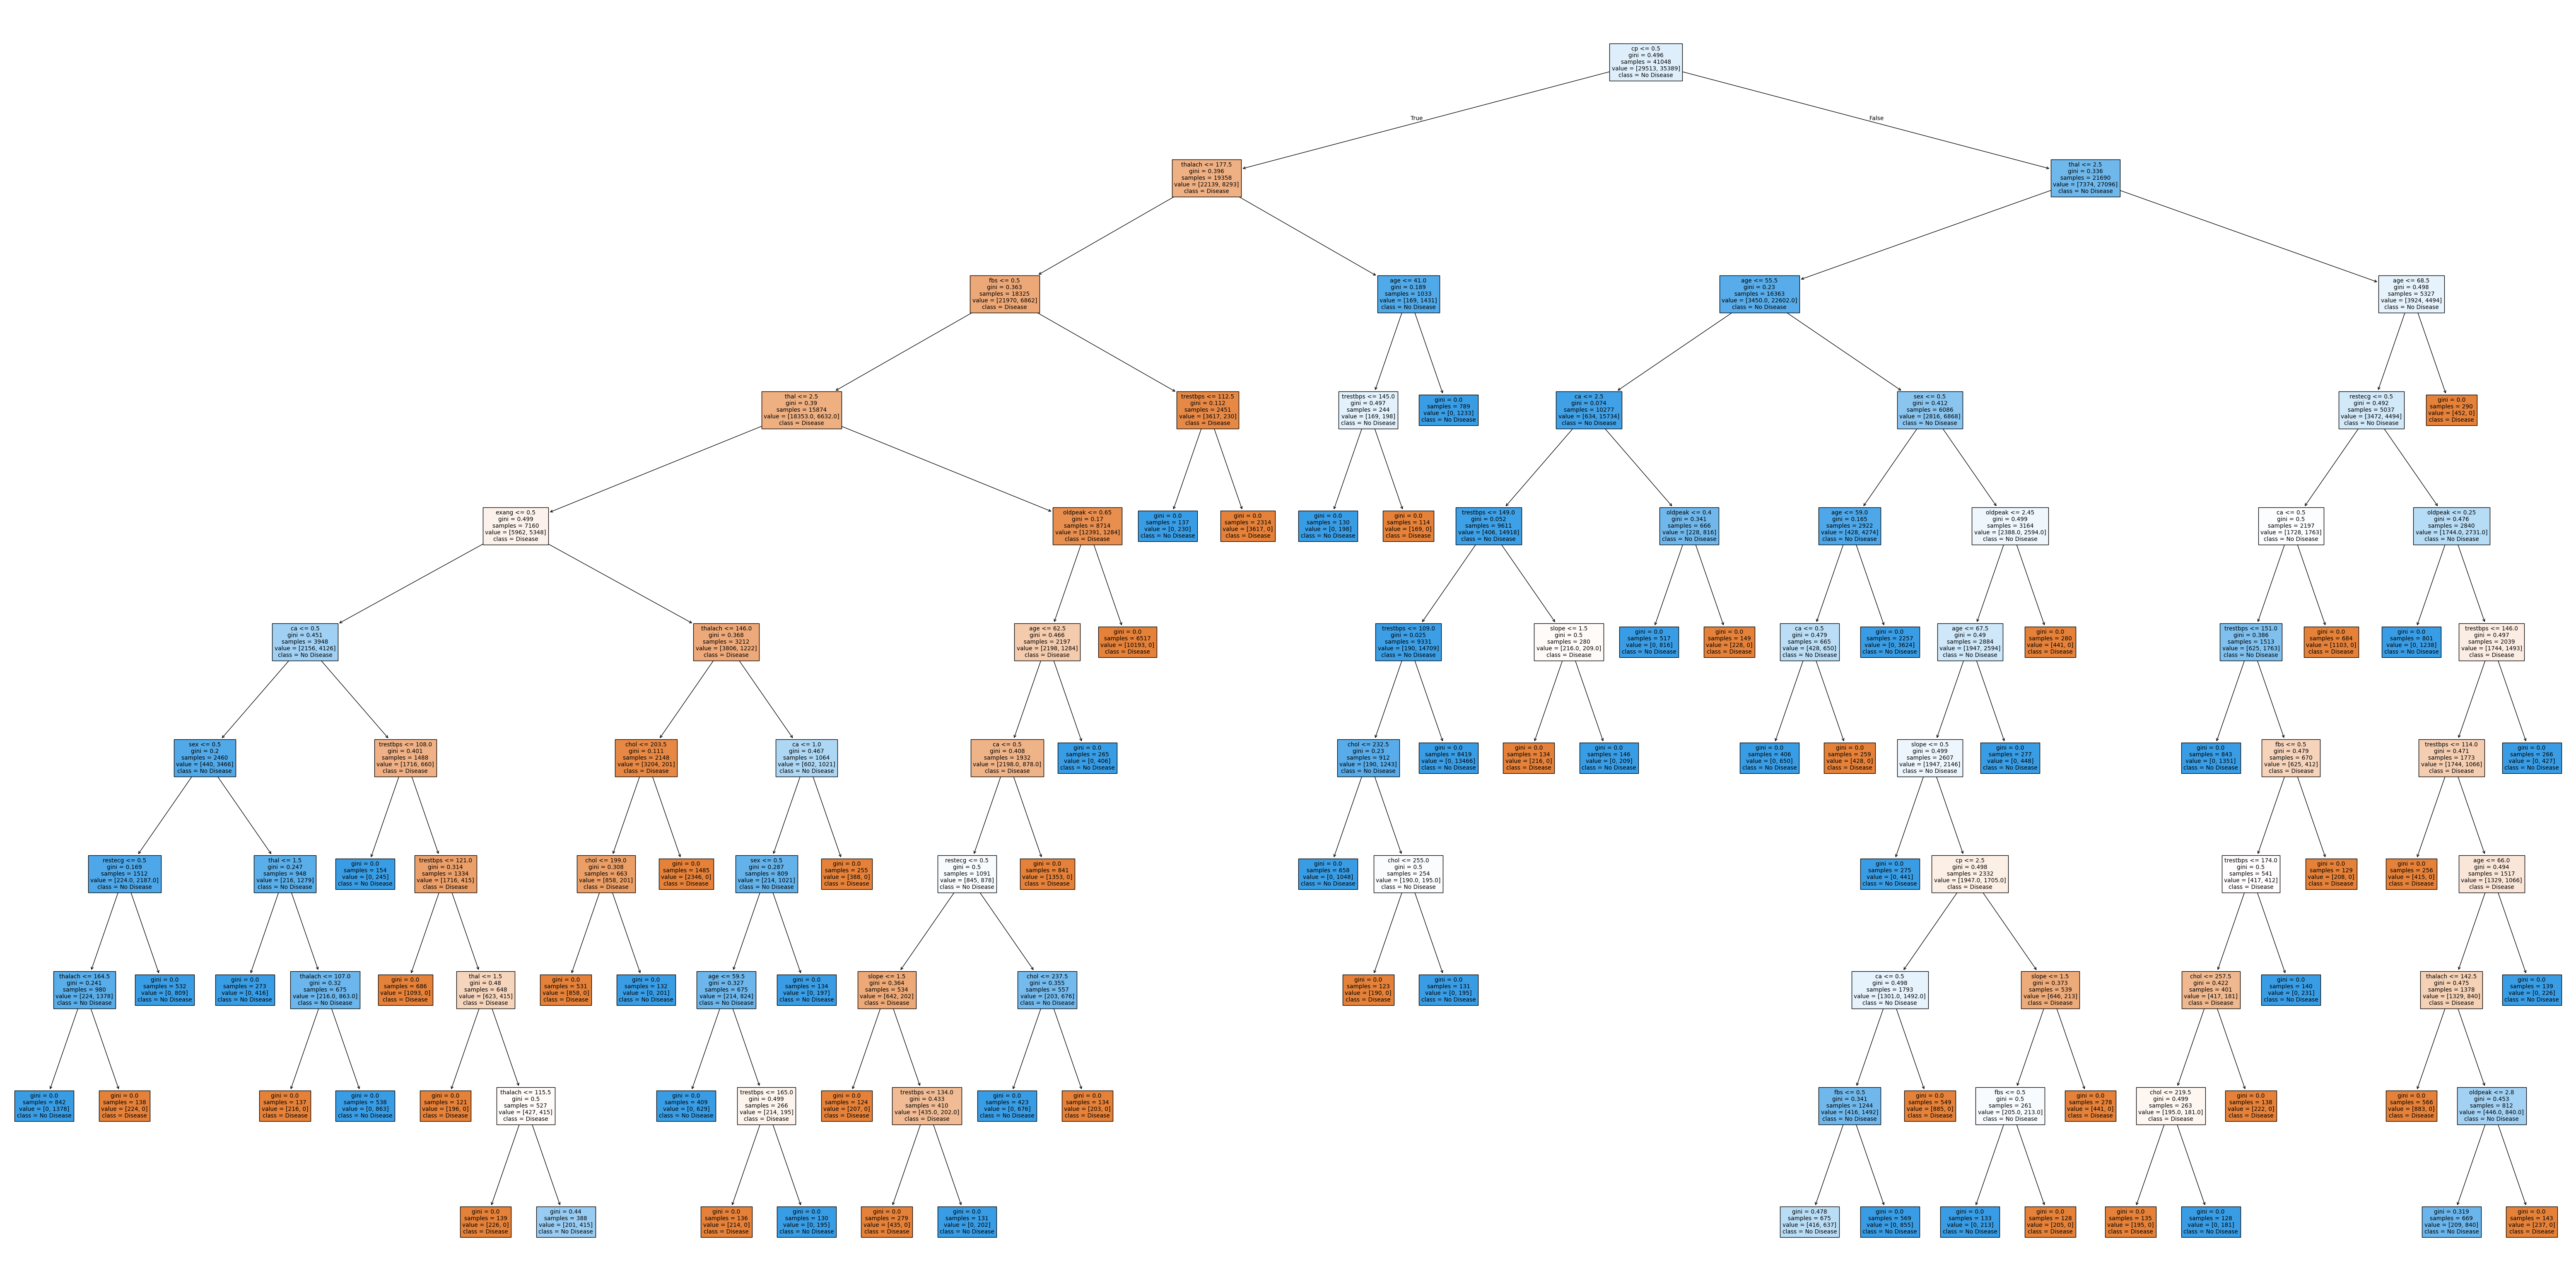

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

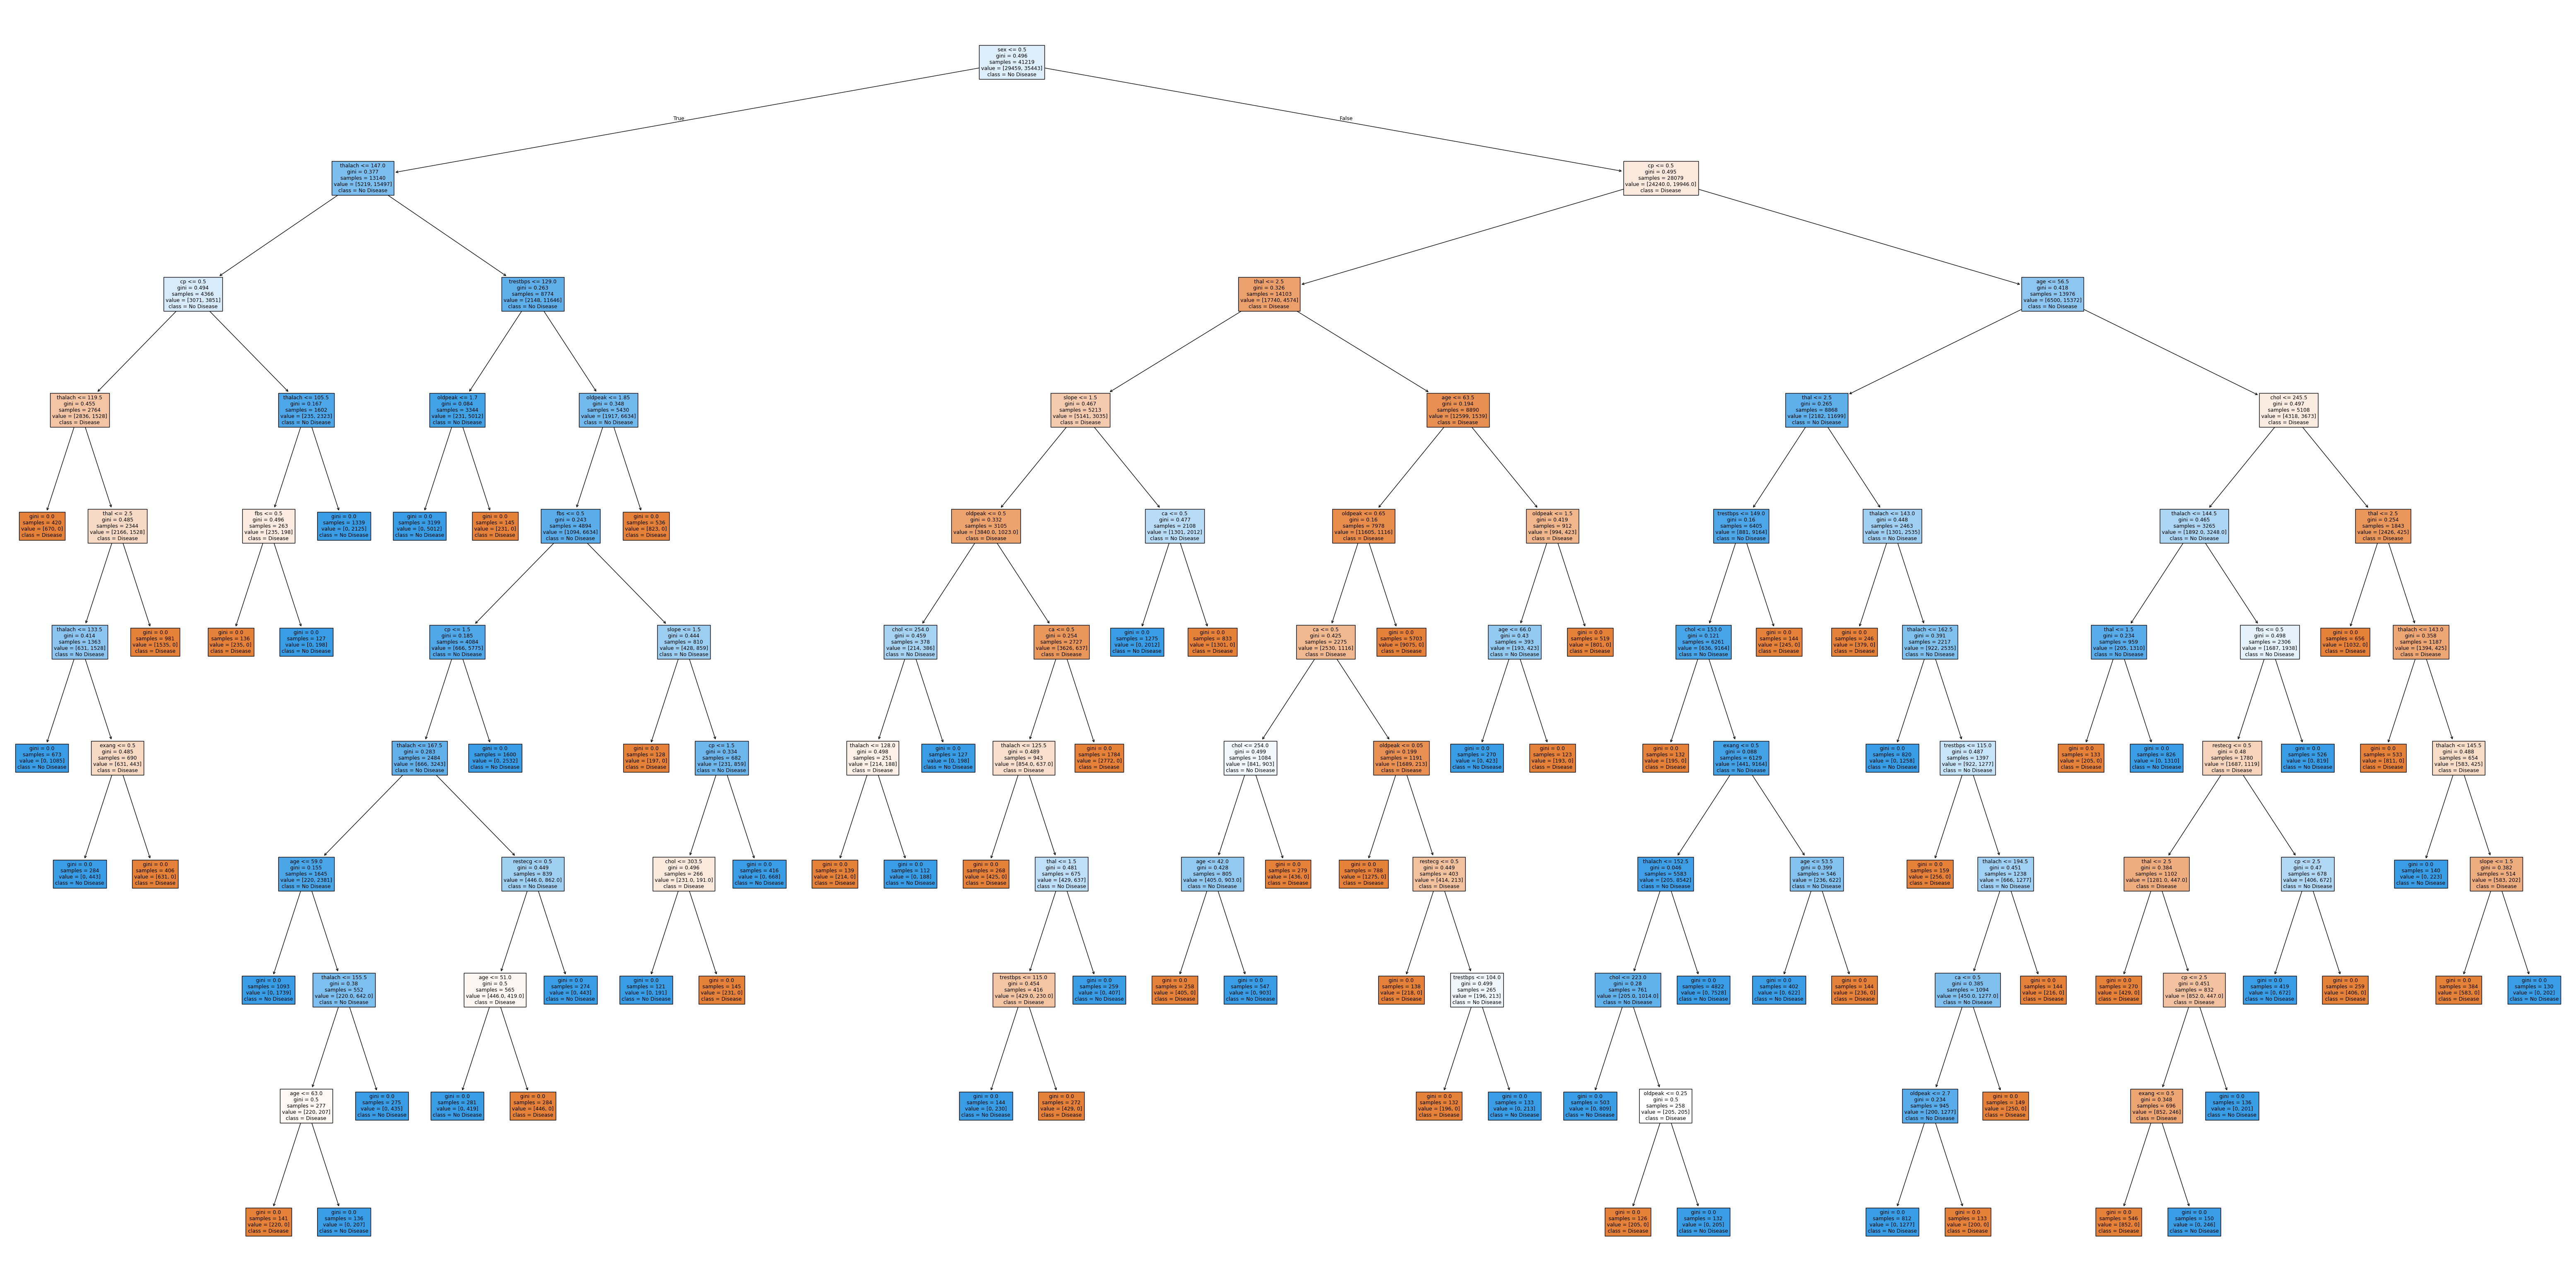

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [15]:
rf_best.feature_importances_


array([0.07304516, 0.0364776 , 0.13540908, 0.07467583, 0.06197983,
       0.01497597, 0.02824607, 0.12842981, 0.0656829 , 0.08981889,
       0.03995093, 0.13289005, 0.11841789])

In [16]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
2,cp,0.135409
11,ca,0.132890
7,thalach,0.128430
12,thal,0.118418
9,oldpeak,0.089819
3,trestbps,0.074676
0,age,0.073045
8,exang,0.065683
4,chol,0.061980
10,slope,0.039951
